In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



## Cleaning Data Sets

In [2]:
#Filtering down columns for each of the 3 data sets as follows:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
#Hazard Mitigation Grant Program Disaster Summaries - disasterNumber and obligatedTotalAmount

In [3]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']]
#FEMA Disaster Declarations Summary is a summarized dataset describing all federally declared disasters, beginning with the first disaster declaration in 1953
#for more information: https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2
disaster_sum_clean

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado
...,...,...,...,...,...
59522,3533,FL,EM,2020,Hurricane
59523,3533,FL,EM,2020,Hurricane
59524,3533,FL,EM,2020,Hurricane
59525,3533,FL,EM,2020,Hurricane


In [4]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
#The dataset contains funded projects (financial obligation to grantee) under the Hazard Mitigation Assistance (HMA) grant programs.
#For more information: https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-projects-v2
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [5]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount']]
#The dataset contains disaster level financial information for FEMA's Hazard Mitigation Grant Program (HMGP)
#For more information: https://www.fema.gov/openfema-data-page/hazard-mitigation-grant-program-disaster-summaries
hazard_sum_clean

,disasterNumber,obligatedTotalAmount
0,1071,2834575.0
1,1337,782081.0
2,1326,333150.0
3,1506,1791043.0
4,1211,413384.0
...,...,...
1731,4551,0.0
1732,4556,0.0
1733,4553,0.0
1734,4554,0.0


In [6]:
# Disaster declarations by number
disaster_sum_clean = disaster_sum_clean.drop_duplicates(subset = ["disasterNumber"])
disaster_sum_summary = pd.pivot_table(disaster_sum_clean,
                              values = ["declarationType"],
                              index = ["incidentType"],
#                              columns = ["fyDeclared"],
                              aggfunc = {"declarationType": "count"})
disaster_sum_summary.sort_values(by = ["declarationType"], ascending = False).head(4)

,declarationType
incidentType,
Fire,1403
Severe Storm(s),982
Flood,836
Hurricane,374


In [7]:
#Looking at an overview of disasters and the Hazard mitigation projects associated with them
disaster_projects = pd.merge(haz_project_clean, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state','incidentType', 'disasterNumber', 'projectIdentifier']).mean()
disaster_summary

numberOfProperties  \
state incidentType    disasterNumber projectIdentifier                       
AK    Coastal Storm   4244.0         DR-4244-0001-P                      0   
                                     DR-4244-0002-P                      0   
                                     DR-4244-0003-R                      0   
                                     DR-4244-0004-F                      0   
                                     DR-4244-0007-M                      0   
...                                                                    ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                      0   
                                     DR-4007-0009-R                      0   
                      4306.0         DR-4306-0003-M                      0   
                                     DR-4306-0004-R                      0   
      Tornado         1599.0         DR-1599-0001-P                      0   

                                                        numberOfFinalProperties  \
state incidentType    disasterNumber projectIdentifier                            
AK    Coastal Storm   4244.0         DR-4244-0001-P                           0   
                                     DR-4244-0002-P                           0   
                                     DR-4244-0003-R                           0   
                                     DR-4244-0004-F                           0   
                                     DR-4244-0007-M                           0   
...                                                                         ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                           0   
                                     DR-4007-0009-R                           0   
                      4306.0         DR-4306-0003-M                           0   
                                     DR-4306-0004-R                           0   
      Tornado         1599.0         DR-1599-0001-P                           0   

                                                        projectAmount  \
state incidentType    disasterNumber projectIdentifier                  
AK    Coastal Storm   4244.0         DR-4244-0001-P           22034.0   
                                     DR-4244-0002-P           25000.0   
                                     DR-4244-0003-R           74672.0   
                                     DR-4244-0004-F           15330.0   
                                     DR-4244-0007-M           28718.0   
...                                                               ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R         1217776.0   
                                     DR-4007-0009-R          151030.0   
                      4306.0         DR-4306-0003-M           17417.0   
                                     DR-4306-0004-R          127938.0   
      Tornado         1599.0         DR-1599-0001-P           22785.0   

                                                        federalShareObligated  \
state incidentType    disasterNumber projectIdentifier                          
AK    Coastal Storm   4244.0         DR-4244-0001-P                  16526.00   
                                     DR-4244-0002-P                  18750.00   
                                     DR-4244-0003-R                  56004.49   
                                     DR-4244-0004-F                  11498.00   
                                     DR-4244-0007-M                  28718.00   
...                                                                       ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                 608003.00   
                                     DR-4007-0009-R                 113273.00   
                      4306.0         DR-4306-0003-M                  17417.00   
                                     DR-4306-0004-R                  95953.50   
      Tornado         1599.0         DR

## Isolating Fire Data 

In [8]:
#From the disaster summary DF, isoloting rows with incidentType = 'Fire'
disaster_sum_clean.head()
fire = disaster_sum_clean['incidentType']=='Fire'
disaster_sum_fire = disaster_sum_clean[fire]
disaster_sum_fire = disaster_sum_fire.drop_duplicates()
disaster_sum_fire

,disasterNumber,state,declarationType,fyDeclared,incidentType
6,11,NH,DR,1953,Fire
87,105,ID,DR,1960,Fire
122,65,CA,DR,1957,Fire
146,119,CA,DR,1962,Fire
934,231,ID,DR,1967,Fire
...,...,...,...,...,...
59183,5319,NV,FM,2020,Fire
59384,5320,WA,FM,2020,Fire
59385,5321,UT,FM,2020,Fire
59386,5322,NV,FM,2020,Fire


### Calculate number of Fire disasters per state

In [9]:
#Group the Fire Disaster Summary DF by State and count 'disasterNumber'
disaster_fire_state = disaster_sum_fire.groupby('state').count()
disaster_fire_state = disaster_fire_state['disasterNumber']
disaster_fire_state

state
AK     24
AL      9
AZ     66
CA    241
CO     68
FL     65
FM      1
GA     12
GU      1
HI     19
ID     19
KS     11
KY      8
LA      1
MA      4
ME      2
MH      1
MI      1
MN      9
MO      1
MT     54
NC      5
ND      1
NE      5
NH      2
NJ      3
NM     57
NV     69
NY      3
OK    105
OR     77
PR      1
SC      4
SD     24
TN     11
TX    250
UT     29
VA      8
WA    108
WI      1
WV      3
WY     20
Name: disasterNumber, dtype: int64

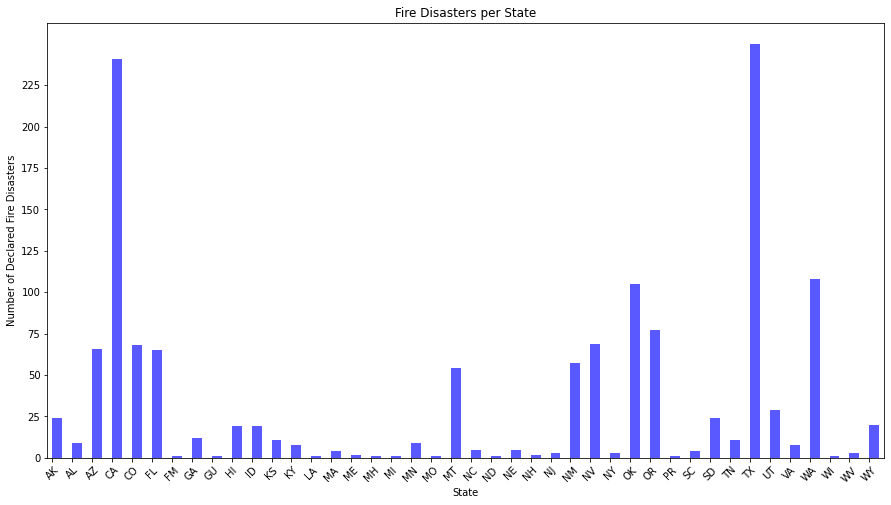

In [10]:
#Plotting the number of declared fire disasters per state
disaster_fire_state.plot(kind='bar', color='b', alpha=0.65, align="edge", figsize=(15,8), rot=45)
plt.xlabel("State")
plt.ylabel("Number of Declared Fire Disasters")
plt.title("Fire Disasters per State")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(0,250,25))
plt.show()

### Calculate Total Obligated Amount per state

In [11]:
#merge the Fire Disaster Summary DF with the Hazard Summary DF to pull in financial data 
fire_state_funding = pd.merge(disaster_sum_fire, hazard_sum_clean, on='disasterNumber')
fire_state_funding

,disasterNumber,state,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,872,CA,DR,1990,Fire,1.671140e+05
1,922,WA,DR,1992,Fire,7.667400e+04
2,919,CA,DR,1992,Fire,2.893003e+06
3,942,CA,DR,1992,Fire,2.352430e+05
4,958,CA,DR,1992,Fire,5.343500e+04
5,1005,CA,DR,1994,Fire,9.168962e+06
6,1119,AK,DR,1996,Fire,1.373341e+06
7,1132,WV,DR,1996,Fire,6.314710e+05
8,1223,FL,DR,1998,Fire,1.786788e+06
9,1340,MT,DR,2000,Fire,3.110090e+05


In [14]:
#group the Fire state funding DF by state and sum in order to calculate the total 'obligatedTotalAmount'
fire_state_funding_gr = fire_state_funding.groupby('state').sum()
fire_state_funding_gr = fire_state_funding_gr['obligatedTotalAmount']
fire_state_funding_gr

state
AK    1.713242e+06
AZ    1.206341e+06
CA    2.063264e+08
CO    1.368124e+06
FL    1.786788e+06
ID    1.305600e+04
MT    5.417720e+05
NM    1.557307e+06
NV    5.337540e+05
NY    2.646353e+08
OK    2.823556e+06
TN    3.972550e+05
TX    2.640101e+07
WA    7.955984e+06
WV    6.314710e+05
Name: obligatedTotalAmount, dtype: float64

In [13]:
#Plot the amount of funding per state
fire_state_two_gr.plot(kind='bar', color='r', alpha=0.65, align="edge", figsize=(15,10), rot=45)
plt.xlabel("State")
plt.ylabel("Fedral Funding for Fire")
plt.title("Fire Funding per State")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(1.305600e+04,2.646353e+08,8e+6))
plt.show()

NameError: name 'fire_state_two_gr' is not defined

### Funding Through the years for California

In [104]:
#Isolate California's funding 
cal = fire_state_funding['state']=='CA'
cal_year_funding = fire_state_funding[cal]
cal_year_funding = cal_year_funding.groupby('fyDeclared').sum()
cal_year_funding['obligatedTotalAmount']

fyDeclared
1990      167114.00
1992     3181681.00
1994     9168962.00
2004     7280835.00
2008    38987611.76
2009     8166071.75
2013       66607.48
2014     4994165.00
2015    45471840.64
2018    77331984.89
2019    11509486.57
Name: obligatedTotalAmount, dtype: float64

Text(0, 0.5, 'Federal Funding')

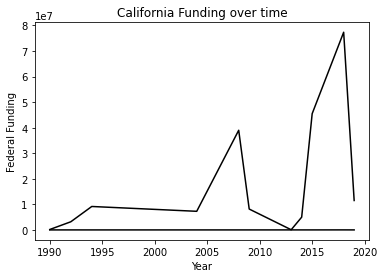

In [105]:
#plot California's funding through the years 
ca_funding_time = plt.plot(cal_year_funding, color="black", label="California Funding over time")
plt.title("California Funding over time")
plt.xlabel("Year")
plt.ylabel("Federal Funding")

Pull in census data and run a scatter plot for correlation between population and funding $ - Run the persons correlation 